In [9]:
import pickle
import pandas as pd
import numpy as np
import pprint
import torch
from openretina.plotting import play_stimulus
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
!ls /Data/

MouseCamCorrected		 eulerlab_retina
all_ventral_df_w_dataset_v3.pkl  movie_responses.pkl


In [3]:
movie_responses = pickle.load(open("/Data/movie_responses.pkl", "rb"))

In [4]:
class CustomPrettyPrinter(pprint.PrettyPrinter):
    def _format(self, object, stream, indent, allowance, context, level):
        if isinstance(object, np.ndarray):
            # Print the shape of the array instead of its contents
            stream.write(f"numpy.ndarray(shape={object.shape})")
        else:
            # Use the standard pretty printing for other types
            super()._format(object, stream, indent, allowance, context, level)


pp = CustomPrettyPrinter(indent=4)

pp.pprint(movie_responses)

{   '20200226_1_1_101_s_5': numpy.ndarray(shape=(18450,)),
    '20200226_1_1_102_s_5': numpy.ndarray(shape=(18450,)),
    '20200226_1_1_103_s_5': numpy.ndarray(shape=(18450,)),
    '20200226_1_1_104_s_5': numpy.ndarray(shape=(18450,)),
    '20200226_1_1_105_s_5': numpy.ndarray(shape=(18450,)),
    '20200226_1_1_106_s_5': numpy.ndarray(shape=(18450,)),
    '20200226_1_1_107_s_5': numpy.ndarray(shape=(18450,)),
    '20200226_1_1_108_s_5': numpy.ndarray(shape=(18450,)),
    '20200226_1_1_111_s_5': numpy.ndarray(shape=(18450,)),
    '20200226_1_1_112_s_5': numpy.ndarray(shape=(18450,)),
    '20200226_1_1_114_s_5': numpy.ndarray(shape=(18450,)),
    '20200226_1_1_115_s_5': numpy.ndarray(shape=(18450,)),
    '20200226_1_1_116_s_5': numpy.ndarray(shape=(18450,)),
    '20200226_1_1_117_s_5': numpy.ndarray(shape=(18450,)),
    '20200226_1_1_118_s_5': numpy.ndarray(shape=(18450,)),
    '20200226_1_1_119_s_5': numpy.ndarray(shape=(18450,)),
    '20200226_1_1_11_s_5': numpy.ndarray(shape=(18450,))

In [6]:
sample_response = movie_responses["20210921_2_4_96_s_5"]

In [15]:
# The sample responses contain both the response to the train and the three presentations of the test stimulus
sample_response.shape

(18450,)

In [5]:
left_movie = np.load("/Data/MouseCamCorrected/left/train_18x16.npy")

*"Our stimulus movie consisted of 113 movie clips, each 150 frames (= 5 s) long. 108 clips were randomly reordered for each recording and split into two 54 clips-long training sequences. The remaining 5 clips formed a fixed test sequence that was presented before, in between, and after the training sequences "*

For neural data:
"time-lapsed 64x64 pixel 755 image scans ($\approx(100 \mu m)^2$) at 7.8125 Hz"

Firing rate predictions in training use an input duration of 50 frames only (30 frames initial context and than 20 more).

In [4]:
30 / 7.8125

3.84

In [3]:
108 * 150

16200

In [6]:
left_movie.shape

(2, 16200, 18, 16)

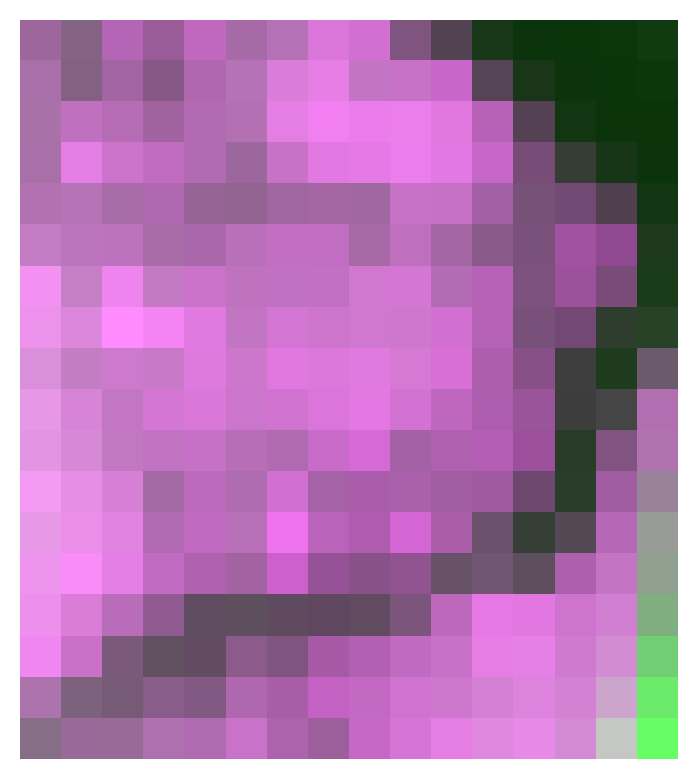

In [12]:
play_stimulus(torch.Tensor(left_movie[:, :1000]))